In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
data = pd.read_csv("Churn_Modelling.csv")

In [96]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [98]:
data.shape

(10000, 14)

In [99]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
data.duplicated().sum()

0

In [102]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

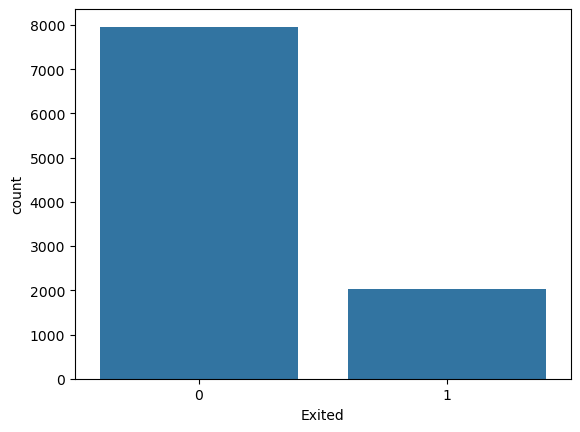

In [103]:
sns.countplot(x='Exited', data=data)

<Axes: xlabel='Geography', ylabel='count'>

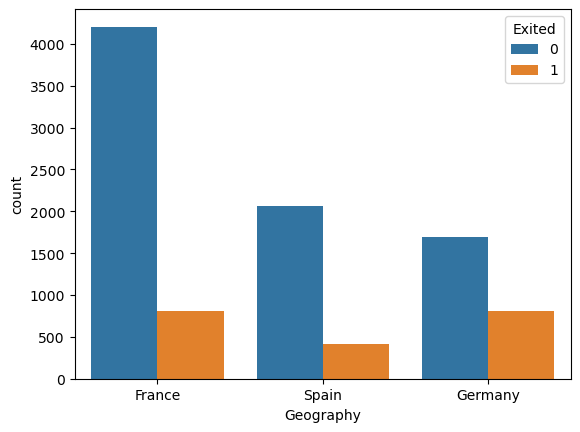

In [104]:
data['Geography'].value_counts()
sns.countplot(x='Geography', hue = data['Exited'],data=data)

<Axes: xlabel='Gender', ylabel='count'>

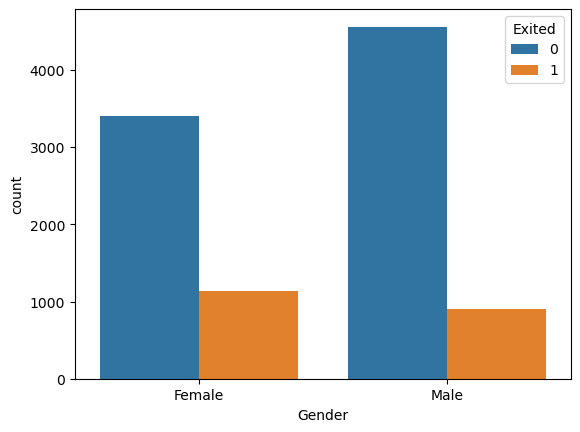

In [105]:
data['Gender'].value_counts()
sns.countplot(x='Gender', hue = data['Exited'],data=data)

In [106]:
data.drop(columns =['CustomerId', 'Surname'],  inplace=True)

In [107]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
# pd.get_dummies(data,columns = ['Geography','Gender'], drop_first=True)

In [109]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  

encoded = encoder.fit_transform(data[['Geography', 'Gender']])

df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Geography', 'Gender']))

data_encoded = pd.concat([data.drop(['Geography', 'Gender'], axis=1), df], axis=1)

data_encoded.head()


,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_encoded.drop(columns =['Exited']),data_encoded['Exited'],test_size = 0.2, random_state = 42)

In [111]:
x_train.shape

(8000, 12)

In [112]:
y_train.shape

(8000,)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [114]:
x_train_scaled

array([[ 1.4692775 ,  0.35649971, -0.6557859 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-1.19499359, -0.20389777,  0.29493847, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-1.15724427, -0.96147213, -1.41636539, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.13108128,  0.86500853, -0.08535128, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [-1.43776677,  0.15932282,  0.3900109 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.78217054,  0.47065475,  1.15059039, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [115]:
x_test_scaled

array([[ 0.42961263, -0.57749609, -0.6557859 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.11342351, -0.29729735,  0.3900109 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-1.1361185 , -0.52560743,  0.48508334, ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.98407747,  0.81311987,  0.77030065, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [-1.35638061,  0.41876609, -0.94100321, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.66407403, -0.24540869,  0.00972116, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [116]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [117]:
model  = Sequential()

In [118]:
model.add(Dense(20, activation = 'relu',input_dim = 12))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 531 (2.07 KB)

 Trainable params: 531 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [121]:
histroy = model.fit(x_train_scaled,y_train,epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7704 - loss: 0.5735 - val_accuracy: 0.7994 - val_loss: 0.4461
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.4601 - val_accuracy: 0.8012 - val_loss: 0.4279
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4251 - val_accuracy: 0.8112 - val_loss: 0.4183
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4049 - val_accuracy: 0.8194 - val_loss: 0.4072
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.4070 - val_accuracy: 0.8406 - val_loss: 0.3890
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.3716 - val_accuracy: 0.8431 - val_loss: 0.3747
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3635 - val_accuracy: 0.8462 - val_loss: 0.3661
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.3619 - val_accu

In [122]:
model.layers[1].get_weights()

[array([[-0.34986818,  0.2762855 ,  0.39217475,  0.24762163,  0.4824418 ,
         -0.40492785,  0.5904691 , -0.35204837, -0.29452392,  0.51437867],
        [-0.3198553 ,  0.25930968,  0.15026672,  0.02025694, -0.00811729,
         -0.69313025,  0.50771546, -0.63234967, -0.18317053, -0.2484028 ],
        [-0.7844483 ,  0.271135  ,  0.5571388 ,  0.5718586 , -0.30634344,
          0.05098846, -0.302025  ,  0.14816841, -0.09703111,  0.16642846],
        [ 0.6580131 , -0.22889374, -0.16528153,  0.44306406, -0.7779108 ,
          0.24156912,  0.5106541 ,  0.24835135, -0.27893946, -0.19960377],
        [-0.40888277,  0.7071427 ,  0.00483676,  0.39247125, -0.31046954,
         -0.23084533, -0.23898824,  0.39313048, -0.15521479,  0.26342902],
        [ 0.03949143,  0.51422894,  0.30133614, -0.29744202,  0.5889535 ,
          0.203223  ,  0.30791137,  0.39859232, -0.11649374,  0.2491623 ],
        [ 0.1963455 ,  0.10764679, -0.397555  , -0.50808483,  0.22016329,
         -0.02254574,  0.1594001

In [123]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


In [124]:
y_pred = np.where(y_log>0.5,1,0)

In [125]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

Accuracy Score : 0.856


In [126]:
histroy.history

{'accuracy': [0.7865625023841858,
  0.796093761920929,
  0.8004687428474426,
  0.813281238079071,
  0.8365625143051147,
  0.850781261920929,
  0.8579687476158142,
  0.860156238079071,
  0.8607812523841858,
  0.8620312213897705,
  0.8637499809265137,
  0.8660937547683716,
  0.8653125166893005,
  0.867968738079071,
  0.8676562309265137,
  0.8673437237739563,
  0.8689062595367432,
  0.8676562309265137,
  0.8684375286102295,
  0.8704687356948853,
  0.8671875,
  0.8687499761581421,
  0.8678125143051147,
  0.8682812452316284,
  0.8700000047683716,
  0.8692187666893005,
  0.870312511920929,
  0.8709375262260437,
  0.8709375262260437,
  0.8695312738418579,
  0.87109375,
  0.8709375262260437,
  0.8687499761581421,
  0.871874988079071,
  0.8714062571525574,
  0.87109375,
  0.871874988079071,
  0.8715624809265137,
  0.8715624809265137,
  0.8725000023841858,
  0.8732812404632568,
  0.8732812404632568,
  0.8725000023841858,
  0.8725000023841858,
  0.8729687333106995,
  0.8715624809265137,
  0.87234

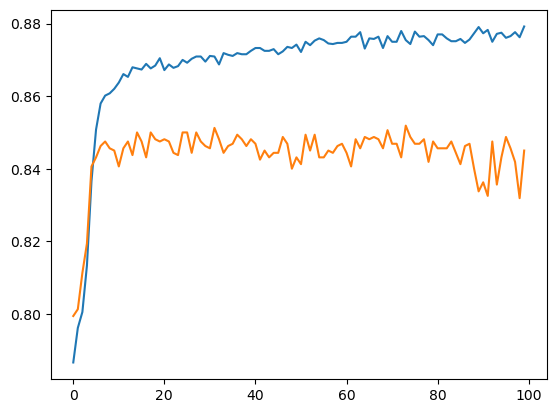

In [168]:
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])

## To solve the we use the regularization in my data set


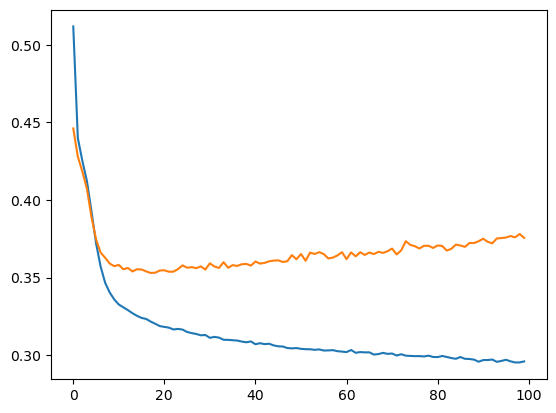

In [171]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])